In [18]:
file='../logs/resnet50lr0001b16.txt'

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd
import csv
%matplotlib inline

In [20]:
# Split Train and Test log lines, throw other lines

reader = csv.reader(open(file, 'rb'))
lines = list(reader)

trainrows = []
for row in lines:
    if len(row) > 0 and "| Epoch: [" in row[0]:
        trainrows.append(row[0])
fo = open("tmp_train.txt", "w")
fo.writelines(line + '\n' for line in trainrows)

testrows = []
for row in lines:
    if len(row) > 0 and "| Test: [" in row[0]:
        testrows.append(row[0])
fo = open("tmp_test.txt", "w")
fo.writelines(line + '\n' for line in testrows)

In [21]:
traindata = pd.read_csv("tmp_train.txt", sep='\s+', skiprows=3, error_bad_lines=False)
top1errortrain = traindata.ix[:,10].as_matrix()
top5errortrain = traindata.ix[:,12].as_matrix()

In [22]:
testdata = pd.read_csv("tmp_test.txt", sep='\s+', skiprows=3, error_bad_lines=False)
top1errortest = testdata.ix[:,8].as_matrix()
top5errortest = testdata.ix[:,12].as_matrix()

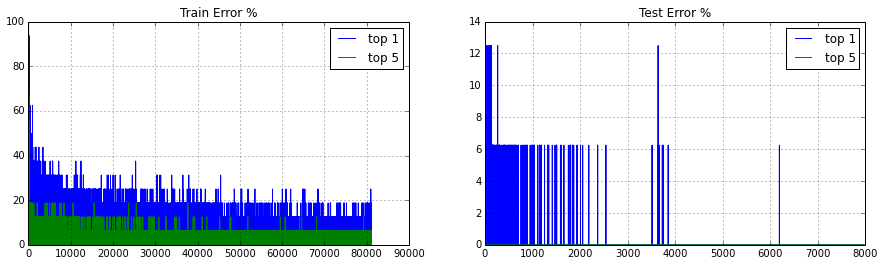

In [23]:
fig1 = plt.figure(num=None, figsize=(15, 4), dpi=80, facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(top1errortrain, label='top 1')
ax1.plot(top5errortrain, label='top 5')
ax1.grid()
ax1.legend()
ax1.set_title('Train Error %')
ax2 = fig1.add_subplot(1,2,2)
ax2.plot(top1errortest, label='top 1')
ax2.plot(top5errortest, label='top 5')
ax2.grid()
ax2.legend()
ax2.set_title('Test Error %')